In [5]:
import pandas as pd
import numpy as np
import os

%load_ext autoreload
%autoreload 2

import seaborn as sns
%pylab inline
sns.set(style="whitegrid")

import sys
sys.path.append('/Users/jake/vc/newton_sampling/code/python')
import convex_body


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


0

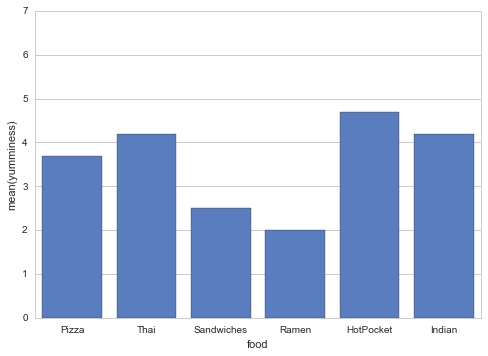

In [3]:


data = pd.DataFrame([
        [3.7, 4.2, 2.5, 2.0, 4.7, 4.2],
        ['Pizza', 'Thai', 'Sandwiches', 'Ramen', 'HotPocket', 'Indian']],
    index=['yumminess','food']).T

fig = plt.figure()
ax = plt.axes(ylim=(0, 7))
sns.set_color_codes("muted")
sns.barplot(x='food',y='yumminess',data=data,label='Food Yumminess',color='b')
fig.savefig('images/foodquality.png', dpi=150,bbox_inches='tight')

for nind in range(6):
    fig = plt.figure()
    ax = plt.axes(ylim=(0, 7))
    colname = 'noisy_yummy_%i' % nind
    data[colname] = data.yumminess.apply(lambda x: x +  1.2*abs(np.random.randn()))
    sns.set_color_codes("pastel")
    sns.barplot(x='food',y=colname,data=data,label=colname,color='b')
    sns.set_color_codes("muted")
    sns.barplot(x='food',y='yumminess',data=data,label='Food Yumminess',color='b')
    fig.savefig('images/foodquality_%i.png'%nind, dpi=150,bbox_inches='tight')
    fig.clf()

os.system('convert -delay 100 -loop 0 images/foodquality_*.png images/foodquality_noisy.gif')
os.system('convert images/foodquality.png images/foodquality.gif')

# sns.set_color_codes("muted")

# sns.barplot(x='food',y='score',data=data,label='Food Yumminess',color='b')
    

# f.savefig('foodquality.png', dpi=150)

In [34]:
data

,score,food,noisy_yummy_1,noisy_yummy_2,noisy_yummy_3
0,3.7,Pizza,4.478850,4.555239,7.699926
1,4.2,Thai,4.564300,4.796351,8.333351
2,2.5,Sandwiches,5.472044,3.021904,5.205991
3,2,Ramen,9.802533,2.163963,2.051454
4,4.7,HotPocket,10.502672,7.800710,4.898809
5,4.2,Indian,5.721708,6.651825,7.249532


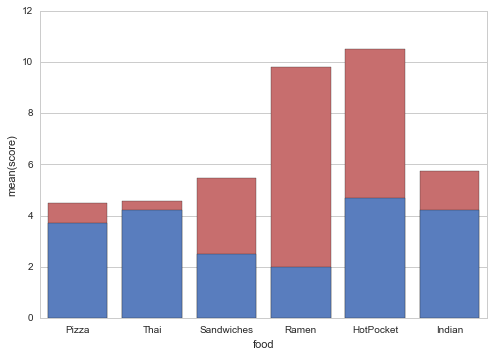

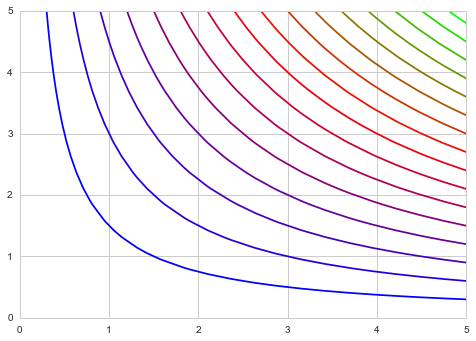

In [19]:
cm = matplotlib.cm

sns.set_color_codes("pastel")
xs = np.linspace(0.,5.,20)
ys = np.linspace(0.,5.,20)
Z = pd.DataFrame([[x*y for y in ys] for x in xs], index=xs, columns=ys)
A,B,C = zip(*[[a,b,c] for ((a,b),c) in Z.stack().iteritems()])
plt.contour(Z.index,Z.columns,Z,20, cmap=cm.brg)


0

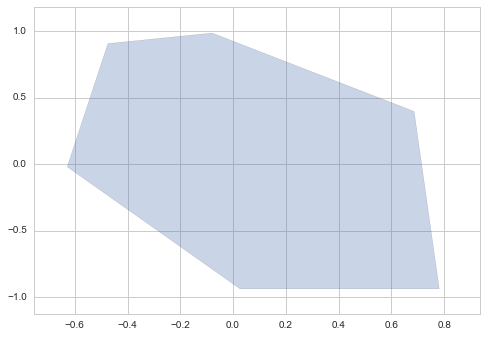

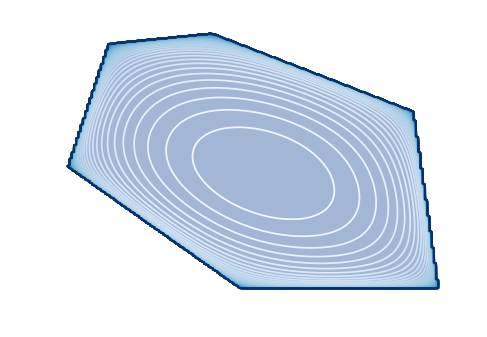

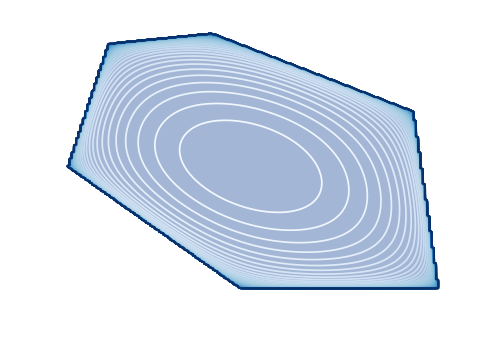

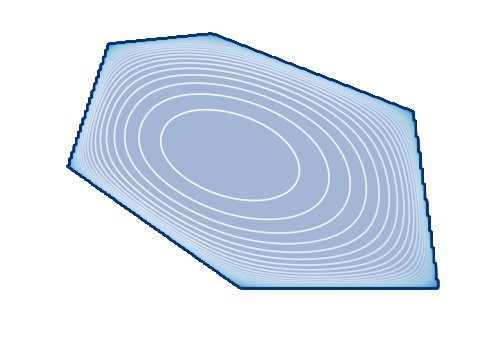

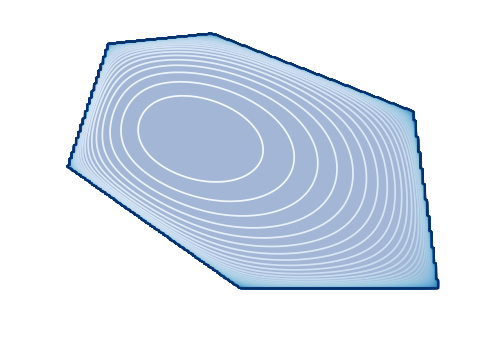

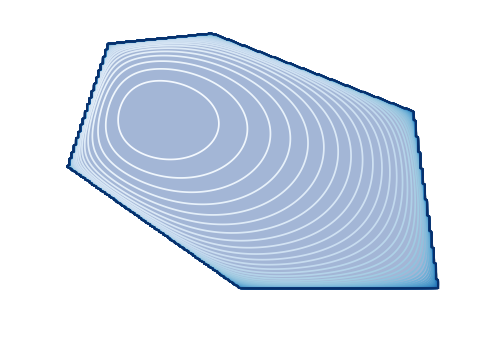

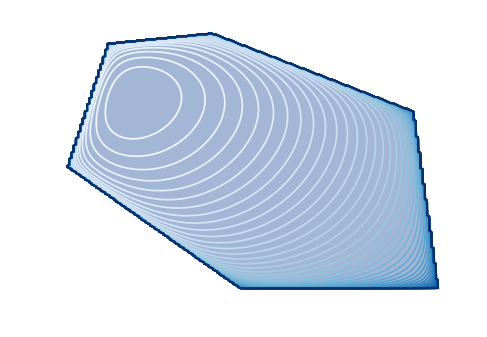

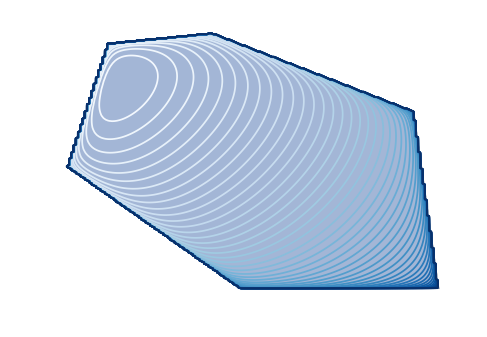

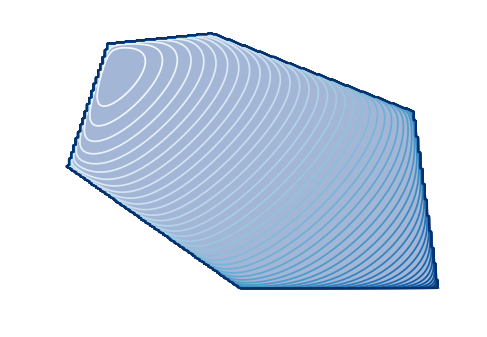

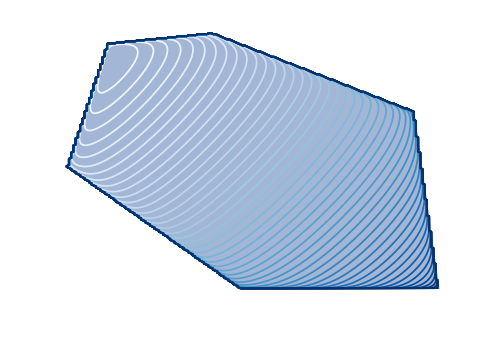

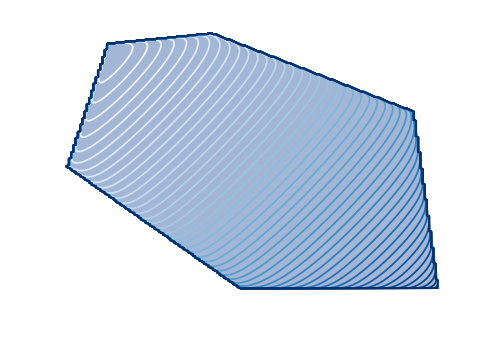

In [51]:

cb = convex_body.ConvexBody(doplot=True)

minx, maxx, miny, maxy = cb.box
xs = np.linspace(minx,maxx,200)
ys = np.linspace(miny,maxy,300)
tht = np.array([2.0,-1.0])
for ind in range(10):
    cb = convex_body.ConvexBody(doplot=True)
    mult = 1.7 ** (ind - 3)
    Z = pd.DataFrame([[cb.log_barrier(np.array([x,y]), theta=mult*tht) 
                       for y in ys] 
                      for x in xs], index=xs, columns=ys)
    minz, maxz = Z.min().min(), Z.max().max()
    Z.fillna(2*maxz,inplace=True)
    cb.fig.contour(xs,ys,Z.T,cmap=cm.Blues, levels=np.linspace(minz,maxz,50))
    cb.plot_body()
    plt.axis('off')
    plt.savefig("images/contour_plot_%i.png"%ind, dpi=100,bbox_inches='tight')

os.system('convert -delay 40 -loop 0 images/contour_plot_*.png images/animated_contour.gif')


In [27]:
Z.shape

(200, 200)

In [29]:
Z = pd.DataFrame([[cb.log_barrier(np.array([x,y]), theta=mult*tht) 
                       for y in ys] 
                      for x in xs], index=xs, columns=ys)

(-0.43954400380279829, 0.85703933747412187)

0

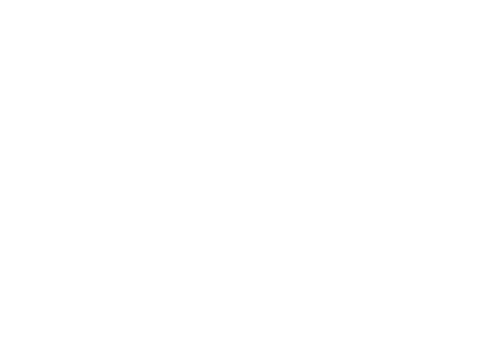

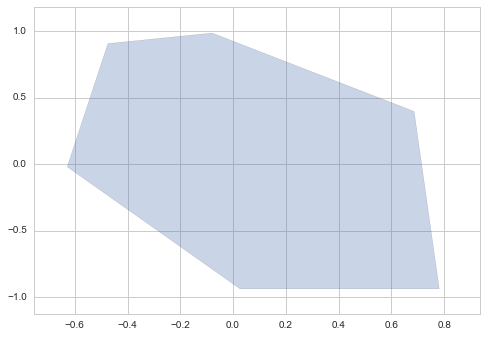

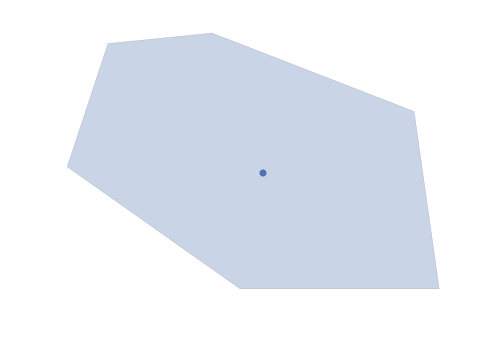

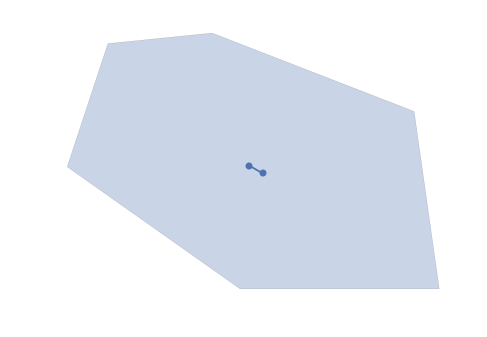

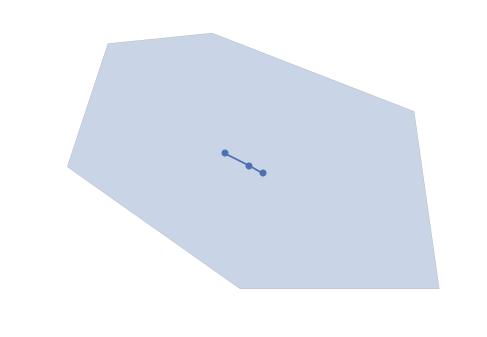

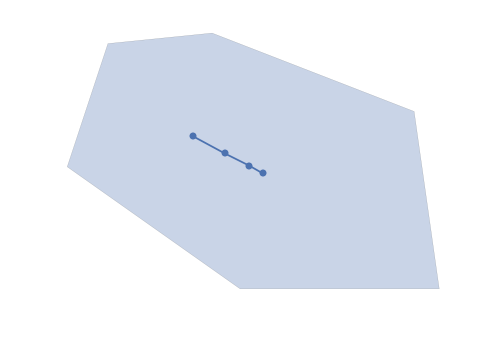

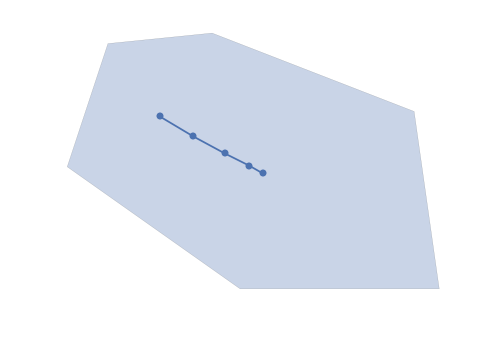

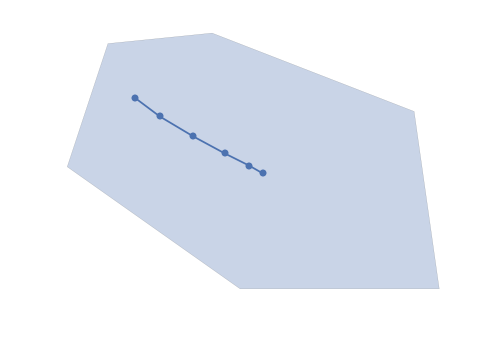

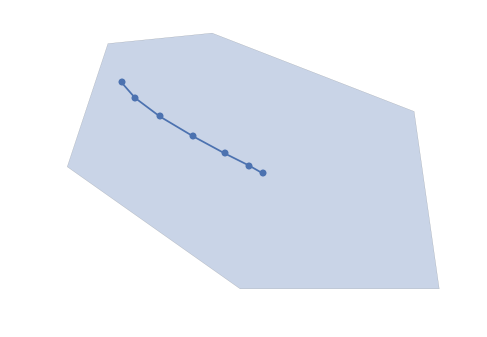

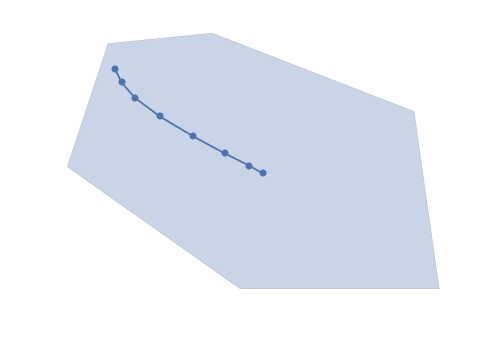

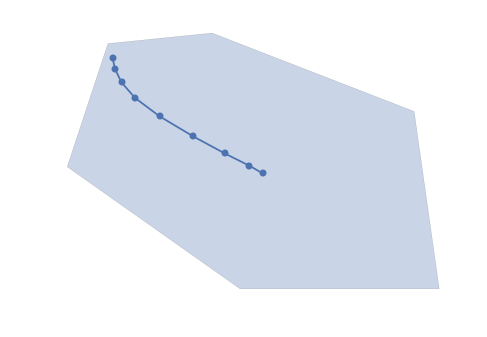

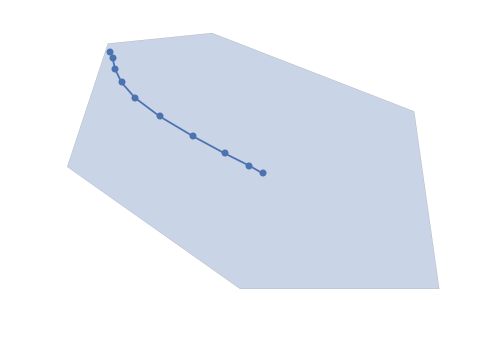

In [50]:
import sys
sys.path.append('/Users/jake/vc/newton_sampling/code/python')
import convex_body

plt.axis('off')
cb = convex_body.ConvexBody(doplot=True)
argmins = []

minx, maxx, miny, maxy = cb.box
xs = np.linspace(minx,maxx,200)
ys = np.linspace(miny,maxy,200)
tht = np.array([2.0,-1.0])
for ind in range(10):
    cb = convex_body.ConvexBody(doplot=True)
    mult = 1.7 ** (ind - 3)
    Z = pd.DataFrame([[cb.log_barrier(np.array([x,y]), theta=mult*tht) 
                       for y in ys] 
                      for x in xs], index=xs, columns=ys)
    xmin,ymin = Z.stack().argmin()
    argmins.append((xmin,ymin))
    amxs,amys = zip(*argmins)
    cb.fig.plot(amxs,amys,'-o')
    plt.axis('off')
    plt.savefig("images/central_path_%i.png"%ind, dpi=100,bbox_inches='tight')
os.system('convert -delay 40 -loop 0 images/central_path_*.png images/animated_central_path.gif')

#     minz, maxz = Z.min().min(), Z.max().max()
#     Z.fillna(2*maxz,inplace=True)
#     cb.fig.contour(xs,ys,Z.T,cmap=cm.Blues, levels=np.linspace(minz,maxz,50))
#     cb.plot_body()
#     plt.savefig("images/contour_plot_%i.png"%ind, dpi=100)
# cb = convex_body.ConvexBody(doplot=True)
# amxs,amys = zip(*argmins)
# cb.fig.plot(amxs,amys,'-o')
# plt.show()

0

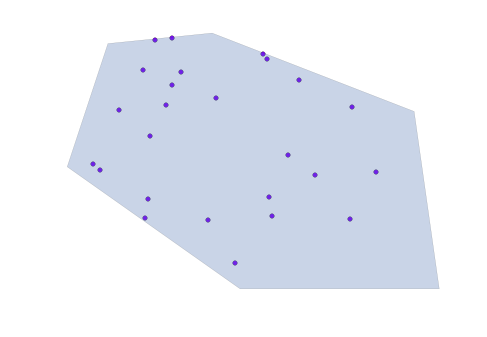

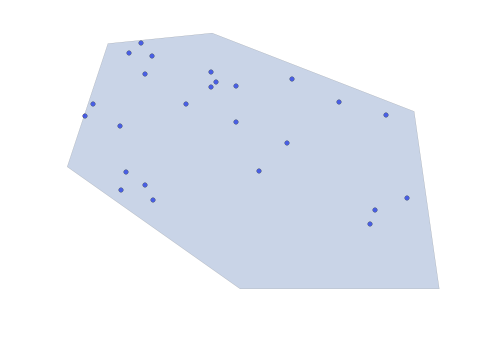

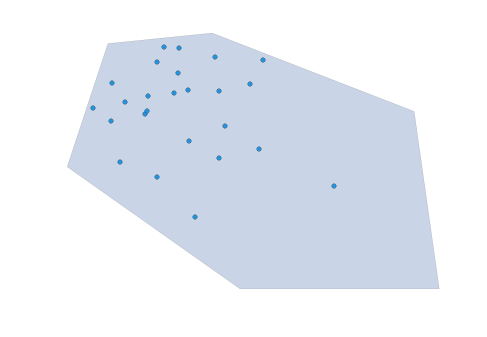

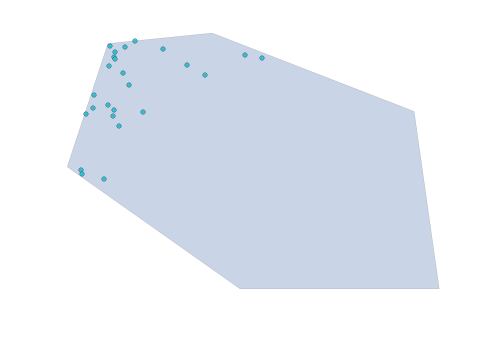

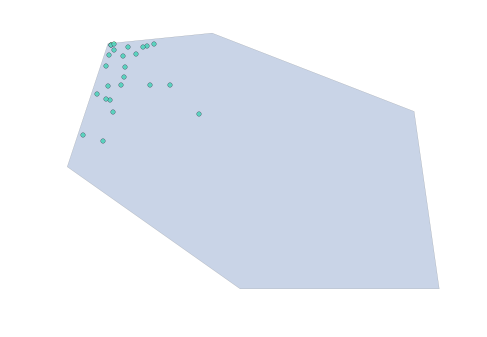

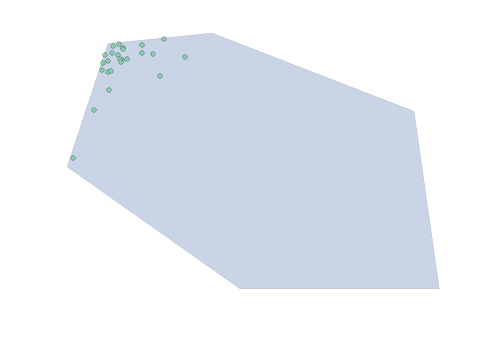

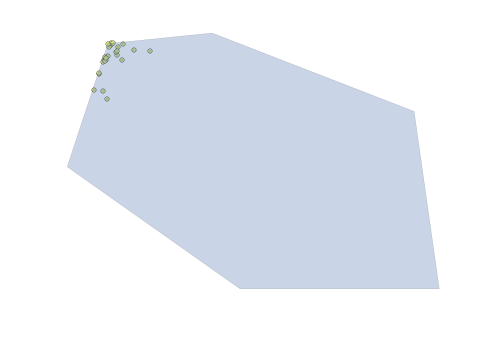

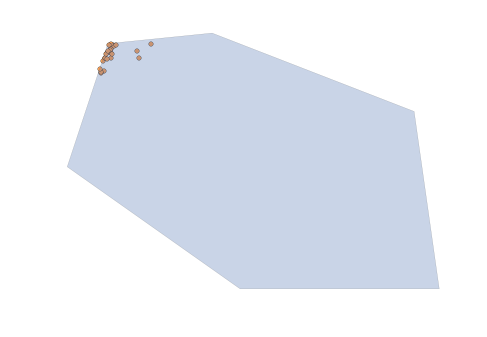

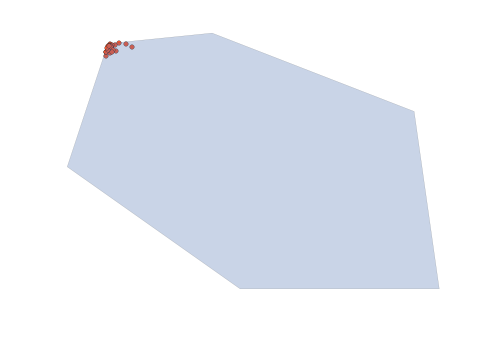

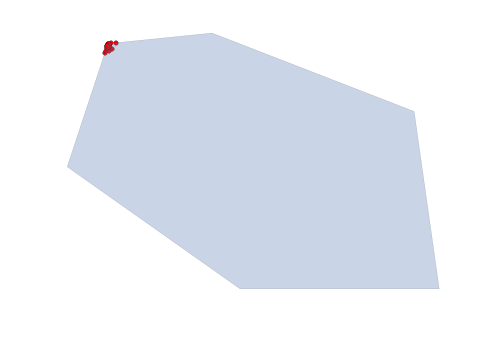

In [74]:
NUMITER = 10
NUMPTS = 25
color=iter(cm.rainbow(np.linspace(0,1,NUMITER)))
sampled_pts = [np.array([0.0,0.0])] * NUMPTS
for itr in range(NUMITER):
    scale = 1.7 ** (itr-1)
    sampled_pts = [cb.hit_and_run_fixed_temp(-scale*tht,100) for  initpt in sampled_pts]
    cb = convex_body.ConvexBody(doplot=True)
    plt.axis('off')
    plt.scatter(*zip(*sampled_pts),c=next(color))
    plt.savefig("images/sampled_points_%02d.png" % itr,dpi=100,bbox_inches='tight')
os.system('convert -delay 80 -loop 0 images/sampled_points_*.png images/animated_samples.gif')


In [83]:
reload(convex_body)

<module 'convex_body' from '/Users/jake/vc/newton_sampling/code/python/convex_body.py'>

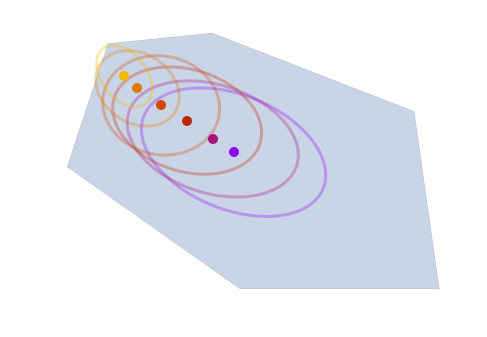

In [50]:
import convex_body
cb = convex_body.ConvexBody(doplot=True)
tht = np.array([2.0,-1.0])
harpoints = [cb.x0.copy() for ind in range(600)]
numtemps = 6
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0.3,0.9,numtemps)]
# colors = ['k','y','b','g']
for pwr,color in enumerate(colors):
    theta = -tht * (1.7**(pwr-2) )
    harpoints = [cb.hit_and_run_fixed_temp(theta,numiter=100,initx=x) for x in harpoints]
#     harpoints = [cb.hit_and_run(tht,15,plot=False) for ind in range(100)]
    convex_body.plot_covariance(harpoints,cb.fig,color=color)
    plt.axis('off')
    plt.savefig('images/ellipsoid_sequence_%02d.png'%pwr, dpi=100, bbox_inches='tight')
os.system('convert -delay 80 -loop 0 images/ellipsoid_sequence_*.png images/animated_ellipsoids.gif')

    
#     plt.scatter(*zip(*harpoints),color=color)
# df = pd.DataFrame(harpoints,columns=['x','y'])
# sns.jointplot(x="x", y="y", data=df, kind="kde")
# plt.savefig('ellipsoid_sequence.png')
plt.show()


In [92]:
os.system('convert -delay 80 -loop 0 images/ellipsoid_sequence_*.png images/animated_ellipsoids.gif')


0

0

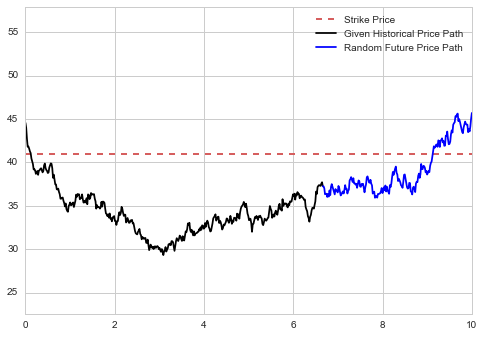

In [56]:
numpts = 600
midpt = 400
NUMITER = 10
xs = np.linspace(0.,10.,numpts)
xsst = xs[:midpt]
xsen = xs[midpt-1:]
flucts = np.random.randn(numpts)
prices = 45. * np.exp(0.011 * np.cumsum(flucts))
ylow = min(prices[:midpt])/1.3
yhigh = max(prices[:midpt])*1.3
for ind in range(NUMITER):
    plt.clf()
    ax = plt.axes()
    ax.set_ylim(bottom=ylow, top=yhigh)
    ax.set_xlim(left=xs[0], right=xs[-1])
    ax.axhline(prices[midpt-1] * 1.1, color='r', linestyle='dashed', linewidth=2, label="Strike Price")
    flucts[midpt:] = np.random.randn(numpts-midpt)
    prices = 45. * np.exp(0.011 * np.cumsum(flucts))
    plt.plot(xsst,prices[:midpt],color='black', label="Given Historical Price Path")
    if ind > 0:
        plt.plot(xsen,prices[(midpt-1):],color='blue', label="Random Future Price Path")
        outname = 'images/price_path_%02d.png' % ind
    else:
        outname="images/price_pathbase.png"
    plt.legend()
    plt.savefig(outname, dpi=100, bbox_inches='tight')
os.system('convert -delay 50 -loop 0 images/price_path_*.png images/animated_price_paths.gif')
